## Final Project Submission

Please fill out:
* Student name: Whitney Ndivi Ngili
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mark Tiba 
* Blog post URL:


In [33]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [34]:
conn = sqlite3.connect("zippedData/im.db")

In [35]:
imdb_movies = pd.read_sql("""
SELECT name TableNames
FROM sqlite_master
WHERE type = 'table'
;
""",conn)
imdb_movies

,TableNames
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [36]:
bom_movies = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [37]:
bom_movies.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [38]:
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [39]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter = "\t",encoding='latin-1')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [40]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz',index_col = 0)
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [41]:
tn_movies = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Assessing imdb movies

In [42]:
q1 = pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
q1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [43]:
q2 = pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
q2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


We can join the movie_basics and movie_ratings tables

In [368]:
q3 = pd.read_sql("""
SELECT *
FROM movie_basics b
JOIN movie_ratings r
USING (movie_id)
WHERE numvotes > 10000
ORDER BY numvotes DESC
;
""",conn)
q3

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405
4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...,...,...,...
2672,tt1514041,4.3.2.1.,4.3.2.1.,2010,117.0,"Crime,Thriller",5.8,10027
2673,tt1422020,Dog Pound,Dog Pound,2010,91.0,Drama,7.0,10025
2674,tt1657299,The Decoy Bride,The Decoy Bride,2011,89.0,"Comedy,Drama,Romance",6.2,10018
2675,tt6097798,Radius,Radius,2017,93.0,"Sci-Fi,Thriller",6.2,10008


In [370]:
imdb = q3.assign(genres=q3.genres.str.split(',')).explode('genres')

In [378]:
imdb.head(40)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066
0,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066
0,tt1375666,Inception,Inception,2010,148.0,Sci-Fi,8.8,1841066
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,8.4,1387769
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Thriller,8.4,1387769
2,tt0816692,Interstellar,Interstellar,2014,169.0,Adventure,8.6,1299334
2,tt0816692,Interstellar,Interstellar,2014,169.0,Drama,8.6,1299334
2,tt0816692,Interstellar,Interstellar,2014,169.0,Sci-Fi,8.6,1299334
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,Drama,8.4,1211405
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,Western,8.4,1211405


Assessing bom_movies

In [45]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


1. foreign_gross dtype is object-change to int
2. assess null values per column:

In [91]:
bom_movies.describe()

,domestic_gross,foreign_gross,year
count,3.356000e+03,3.356000e+03,3356.000000
mean,2.877149e+07,4.532518e+07,2013.970203
std,6.700694e+07,1.131263e+08,2.479064
min,1.000000e+02,0.000000e+00,2010.000000
25%,1.200000e+05,0.000000e+00,2012.000000
50%,1.400000e+06,1.400000e+06,2014.000000
75%,2.795000e+07,2.970000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [47]:
#defining a function that prints the percentage of null rows in all columns 
def find_percentage_of_nulls(df):
    for column in df.columns:
        percentage = round(df[column].isnull().sum()/(len(df))*100,3)
        print(f"The percentage of null rows in column {column} is {percentage}%")

find_percentage_of_nulls(bom_movies)        

The percentage of null rows in column title is 0.0%
The percentage of null rows in column studio is 0.148%
The percentage of null rows in column domestic_gross is 0.827%
The percentage of null rows in column foreign_gross is 39.858%
The percentage of null rows in column year is 0.0%


- The studio column only has 5 rows with null values while the domestic_gross column only has 28. This represents 0.827% and 0.148% of the dataset respectively. It makes sense to drop them as they will not affect the data analysis.
- The foreign_gross column has almost 40% of the data being null. 

In [48]:
#dropping null rows in studion column
bom_movies.dropna(inplace = True, subset = ['studio','domestic_gross'])

In [49]:
bom_movies.foreign_gross.fillna('0',inplace = True)

In [50]:
bom_movies.foreign_gross = bom_movies.foreign_gross.map(lambda x:x.replace(",",""))

In [51]:
bom_movies.foreign_gross = bom_movies.foreign_gross.astype(float)

In [315]:
bom_movies.loc[bom_movies.studio == 'LGF'][:20]

,title,studio,domestic_gross,foreign_gross,year
26,The Expendables,LGF,103100000.0,171400000.0,2010
51,Saw 3D,LGF,45700000.0,90400000.0,2010
64,Killers,LGF,47100000.0,51100000.0,2010
65,Kick-Ass,LGF,48100000.0,48100000.0,2010
87,The Last Exorcism,LGF,41000000.0,26700000.0,2010
88,The Next Three Days,LGF,21100000.0,46300000.0,2010
94,Tyler Perry's Why Did I Get Married Too?,LGF,60100000.0,578000.0,2010
101,From Paris with Love,LGF,24100000.0,28700000.0,2010
102,Daybreakers,LGF,30100000.0,21300000.0,2010
103,Alpha and Omega,LGF,25100000.0,25400000.0,2010


In [310]:
bom_movies.groupby(['studio']).sum().sort_values('foreign_gross',ascending = False)[:10]

,domestic_gross,foreign_gross,year
studio,,,
BV,1.841903e+10,2.579385e+10,213451
Fox,1.094950e+10,2.005587e+10,273882
WB,1.216805e+10,1.866790e+10,281941
Uni.,1.290239e+10,1.685477e+10,296082
Sony,8.459683e+09,1.394524e+10,219565
Par.,7.685871e+09,1.186338e+10,203417
WB (NL),3.995700e+09,6.339000e+09,90644
LGF,4.118963e+09,4.475619e+09,205423
P/DW,1.682900e+09,3.393600e+09,20109


In [53]:
#checking for duplicates
bom_movies.duplicated().sum()

0

Assessing rt_movies

In [54]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [55]:
#finding percentage of nulls in columns in rt_movies
find_percentage_of_nulls(rt_movies)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column synopsis is 3.974%
The percentage of null rows in column rating is 0.192%
The percentage of null rows in column genre is 0.513%
The percentage of null rows in column director is 12.756%
The percentage of null rows in column writer is 28.782%
The percentage of null rows in column theater_date is 23.013%
The percentage of null rows in column dvd_date is 23.013%
The percentage of null rows in column currency is 78.205%
The percentage of null rows in column box_office is 78.205%
The percentage of null rows in column runtime is 1.923%
The percentage of null rows in column studio is 68.333%


- The following columns have a large percentage of null values : currency, box_office and studio. The best way to proceed is by dropping these columns. Columns synopsis,director,writer,theater_date,dvd_date are to be dropped as they are not required for this analysis.
- The columns rating,genre, runtime have a small number of null values. These will be handled by dropping the rows.

In [56]:
#dropping columns with too many null values
rt_movies.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office','studio'],
               axis = 1,inplace=True)

In [58]:
#dropping rows with null values
rt_movies.dropna(subset = ['rating','genre','runtime'],inplace = True)

In [60]:
#confirming if null rows have been removed
find_percentage_of_nulls(rt_movies)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column rating is 0.0%
The percentage of null rows in column genre is 0.0%
The percentage of null rows in column runtime is 0.0%


In [61]:
#checking for duplicates
rt_movies.duplicated().sum()

0

In [104]:
rt_movies.head(20)

,id,rating,genre,runtime
0,1,R,Action and Adventure|Classics|Drama,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,108 minutes
2,5,R,Drama|Musical and Performing Arts,116 minutes
3,6,R,Drama|Mystery and Suspense,128 minutes
4,7,NR,Drama|Romance,200 minutes
5,8,PG,Drama|Kids and Family,95 minutes
6,10,PG-13,Comedy,82 minutes
7,13,R,Drama,123 minutes
8,14,R,Drama,117 minutes
9,15,PG-13,Action and Adventure|Mystery and Suspense|Scie...,108 minutes


Assessing rt_reviews

In [110]:
rt_reviews.head()

,id,review,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [63]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [64]:
#checking for percentage of null values in each column
find_percentage_of_nulls(rt_reviews)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column review is 10.22%
The percentage of null rows in column rating is 24.833%
The percentage of null rows in column fresh is 0.0%
The percentage of null rows in column critic is 5.001%
The percentage of null rows in column top_critic is 0.0%
The percentage of null rows in column publisher is 0.568%
The percentage of null rows in column date is 0.0%


rt_reviews has more than 54000 entries. In this case, dropping rows with null values would suffice as there would still be enough entries to analyse

In [66]:
#dropping rows with null values
rt_reviews.dropna(inplace = True)

In [69]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [74]:
rt_reviews.fresh.value_counts()

fresh     20765
rotten    13223
Name: fresh, dtype: int64

The rating column is not consistent with the rating format, it can therefore be dropped. The fresh column can be used to 

In [75]:
rt_reviews.drop('rating', inplace = True, axis = 1)

In [77]:
#checking for duplicates
rt_reviews.duplicated().sum()

0

In [155]:
rt_merged = rt_reviews.merge(rt_movies, how = 'inner',on = 'id')

In [353]:
rt_merged.shape

(33408, 10)

In [354]:
genres.shape

(73100, 10)

In [336]:
genres = rt_merged.assign(genre=rt_merged.genre.str.split('|')).explode('genre')

<AxesSubplot:xlabel='rating'>

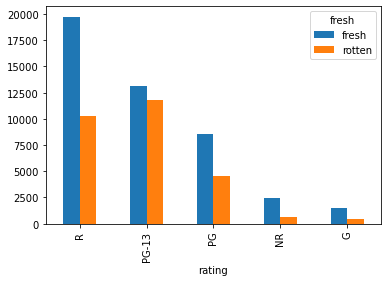

In [341]:
genres.groupby(['rating','fresh']).count()['id'].unstack().sort_values(['fresh','rotten'],ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='genre'>

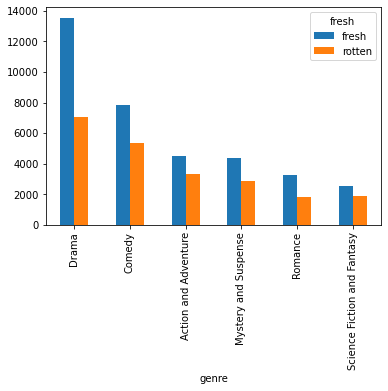

In [300]:
genres.groupby(['genre','fresh']).count()['id'].unstack().sort_values(['fresh','rotten'],ascending=False)[:6].plot(kind='bar')

In [349]:
genres

,id,review,fresh,critic,top_critic,publisher,date,rating,genre,runtime
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Drama,108 minutes
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",R,Science Fiction and Fantasy,108 minutes
1,3,"Quickly grows repetitive and tiresome, meander...",rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",R,Drama,108 minutes
1,3,"Quickly grows repetitive and tiresome, meander...",rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",R,Science Fiction and Fantasy,108 minutes
2,3,Cronenberg is not a director to be daunted by ...,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",R,Drama,108 minutes
...,...,...,...,...,...,...,...,...,...,...
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Action and Adventure,94 minutes
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Art House and International,94 minutes
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Comedy,94 minutes
33407,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",R,Drama,94 minutes


Assessing tn_movies

In [79]:
tn_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [80]:
find_percentage_of_nulls(tn_movies)

The percentage of null rows in column id is 0.0%
The percentage of null rows in column release_date is 0.0%
The percentage of null rows in column movie is 0.0%
The percentage of null rows in column production_budget is 0.0%
The percentage of null rows in column domestic_gross is 0.0%
The percentage of null rows in column worldwide_gross is 0.0%


In [81]:
tn_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [82]:
tn_movies.duplicated().sum()

0

Assessing tmdb_movies

In [316]:
tmdb_movies.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [88]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [90]:
tmdb_movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [84]:
find_percentage_of_nulls(tmdb_movies)

The percentage of null rows in column genre_ids is 0.0%
The percentage of null rows in column id is 0.0%
The percentage of null rows in column original_language is 0.0%
The percentage of null rows in column original_title is 0.0%
The percentage of null rows in column popularity is 0.0%
The percentage of null rows in column release_date is 0.0%
The percentage of null rows in column title is 0.0%
The percentage of null rows in column vote_average is 0.0%
The percentage of null rows in column vote_count is 0.0%


In [320]:
tmdb_movies.loc[tmdb_movies.popularity > 20].head(40)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635
